100%|██████████| 4/4 [00:00<00:00, 58.02it/s]

device: cuda:0
modelo 1:
device: cuda:0
Epoch 1 of 1, Train Loss: 0.137, Len Train:4
Epoch 1 of 1, Validate Loss: 0.120 Len Validate:1


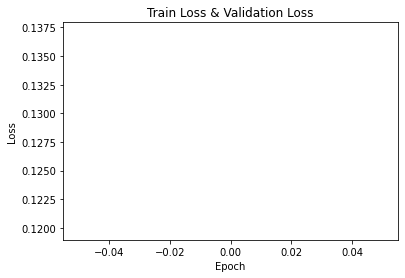

  0%|          | 0/1 [00:00<?, ?it/s]

device: cuda:0
time: 0.12271952629089355


100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

time: 0.07959389686584473
Len test:1


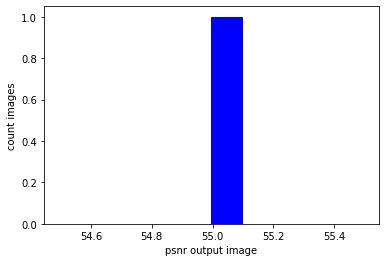

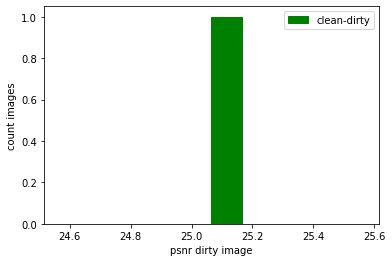

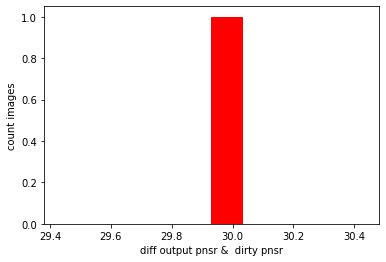

Image size: 28
Len dataset: 10
Type psf: psf_gauss_28x28
Number epoch: 1
Learning rate: 0.001
Batch train: 2


Net:  Autoencoder1(
  (enc1): Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc2): Conv2d(28, 14, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc3): Conv2d(14, 7, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (enc4): Conv2d(7, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dec1): ConvTranspose2d(3, 3, kernel_size=(3, 3), stride=(2, 2))
  (dec2): ConvTranspose2d(3, 7, kernel_size=(3, 3), stride=(2, 2))
  (dec3): ConvTranspose2d(7, 14, kernel_size=(3, 3), stride=(2, 2))
  (out): Conv2d(28, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dec4): ConvTranspose2d(14, 28, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
)


avg_diff: 29.930770874023438, std_diff: 0.0, avg: 54.99639892578125, std: 0.0, avg_dirty: 25.065628051757812, std_dirty

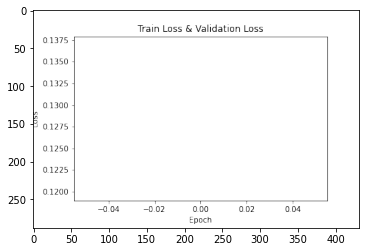

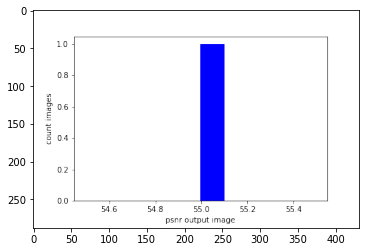

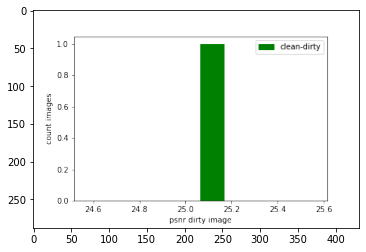

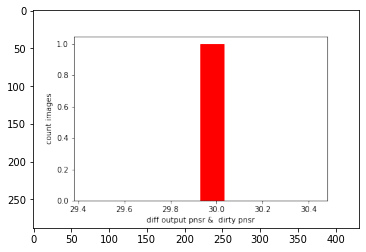

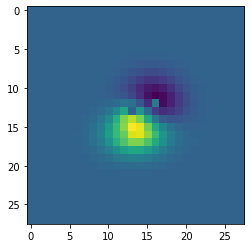

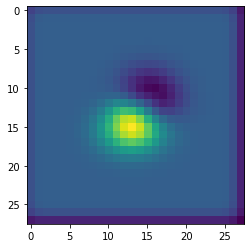

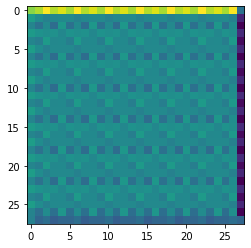

In [2]:
from model import Model
from autoencoder import Autoencoder1 as net1
import torch.nn as nn
import torch.optim as optim
import cupy as cp
from auxiliaryFunctions import AuxiliaryFunctions

device = 0
size_figure = 28
type_psf_gauss = 'psf_gauss_'+str(size_figure)+'x'+str(size_figure)
type_psf_real = 'psf_real_'+str(size_figure)+'x'+str(size_figure)
learning_rate = 1e-3 
criterion = nn.MSELoss() ## definir si esto va a variar o fijarlo! 
net = net1(size = size_figure,device = device)  
net_name = 'net_2'
optimizer = optim.Adam(net.parameters(), lr=learning_rate) ### QUIZAS NO ES UN PARAMETRo DE ENTRADA! 
start = 0 
datasets = [10] 
            ##VER HASTA CAUNDO y HACER COSA DINAMICA AQUI .....
            ## leer un fit y en memoria y cachar hasta cuanto te da ... y luego crear un 
            ## % arange salto de 10% ??..        
# Dejar esto fijo ##
batchs = [2]
epochs = [1]
types =  [type_psf_gauss]
#######################
size_save = 1
index = 0 

for stop in datasets:
    for batch_train in batchs:
        for num_epochs in epochs:
            for type_psf in types:
                index = index +1
                print('modelo '+str(index)+':')
                m = Model(size_figure = size_figure,
                                    type_psf = type_psf,
                                    num_epochs = num_epochs,
                                    learning_rate =  learning_rate , 
                                    batch_train = batch_train ,
                                    start = start,
                                    stop = stop,
                                    criterion = criterion,
                                    optimizer = optimizer,
                                    device = device,
                                    net_name = net_name
                ) 
                net = m.run_train_data(net = net,start = 0 , stop = stop)
                net = m.run_test_data(net = net,start = 0, stop = stop,size_save = size_save)
                m.get_resumen(net= net,idx = 0)
